In [30]:
import pandas as pd
import fiftyone as fo
import seaborn as sns
sns.set_theme(style='darkgrid', palette='mako')

## Label distribution in ROV dataset

In [33]:
def make_df(dataset, splits):
    """Counts how many annotations of each label exist per split.

    Args:
        dataset (fiftyone dataset): Fiftyone dataset.
        splits (list): List of splits in the fiftyone dataset. E.g.: ['train', 'test']

    Returns:
        pandas DataFrame: label, count and split columns.
    """    
    df_list = []
    for i in splits:
        view = dataset.match_tags(i)
        count_dict = view.count_values("ground_truth.detections.label")

        df = pd.DataFrame(count_dict.items(), columns=['label', 'count']).copy()
        df["split"] = i
        df_list.append(df)
    
    return pd.concat(df_list)

In [31]:
rov_dataset = fo.load_dataset("rov")

In [34]:
label_count = make_df(rov_dataset, ["train", "val", "test"])
label_count.head()

# save label counts
# label_count.to_csv("../results/label_count_split.csv", index=False)

,label,count,split
0,Medusae,2708,train
1,Ctenophora,5174,train
2,Euphausiacea,500,train
3,Other,35,train
4,Crustacea,21,train


/tmp/ipykernel_1162/1711040779.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  label_dist.set_xticklabels(label_dist.get_xticklabels(), rotation=45, horizontalalignment='right');


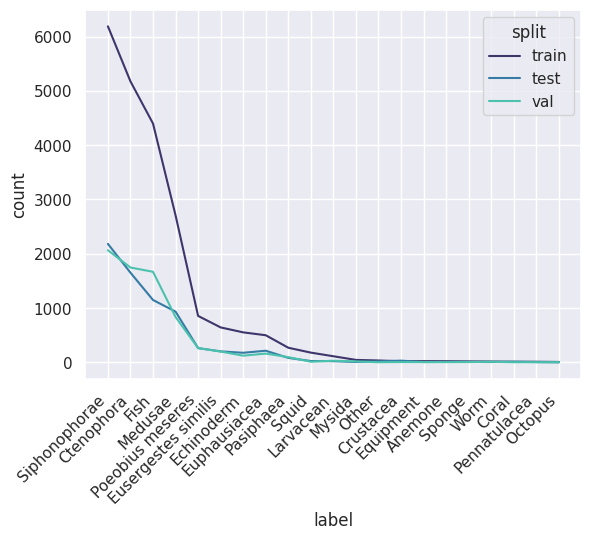

In [35]:
# sort by count, more labels first
sorted_df = label_count.sort_values(by='count', ascending=False)

# plot label counts
label_dist = sns.lineplot(data=sorted_df, x="label", y="count", hue="split", palette="mako")
label_dist.set_xticklabels(label_dist.get_xticklabels(), rotation=45, horizontalalignment='right');

## AUV models evaluation

In [6]:
auv_results = pd.read_csv('../artifacts/results/auv_results.csv')

In [7]:
auv_results.columns

Index(['model', 'auv_train_sample_count', 'training_time', 'val_image_count',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'fitness', 'preprocess', 'inference', 'loss',
       'postprocess'],
      dtype='object')

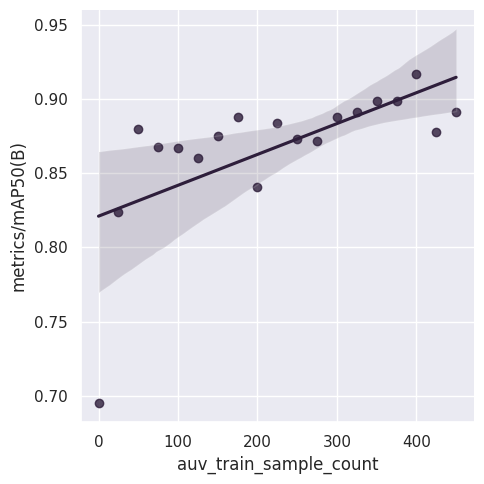

In [27]:
sns.lmplot(y='metrics/mAP50(B)', x='auv_train_sample_count', data=auv_results, fit_reg=True);

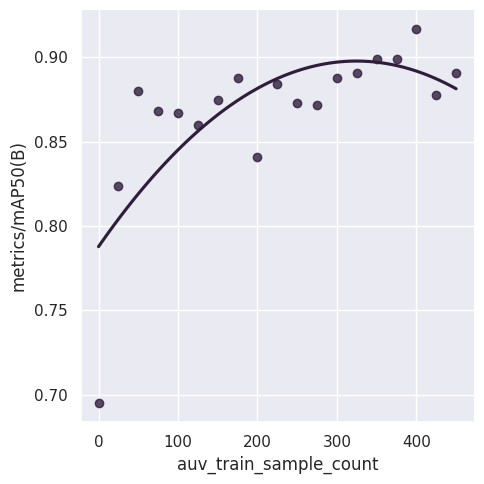

In [26]:
sns.lmplot(y='metrics/mAP50(B)', x='auv_train_sample_count', data=auv_results, fit_reg=True, order=2, ci=None);